In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from data_utils import load_images

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Set your test directory path
# test_dir = "test"  # or the full path if needed
train_dir = "train"  # or the full path if needed
# train_dir = "validation"  # or the full path if needed

# train_images, train_image_ids, train_image_labels = load_images(train_dir, percent=0.05)
train_image_dataset = load_images(train_dir)
print(f"Loaded {len(train_image_dataset)} images from {train_dir} directory.")

Loaded 12500 images from train directory.


In [5]:
from sklearn import svm

print(train_image_dataset.images.shape)
model = svm.SVC()
model.fit(train_image_dataset.images, train_image_dataset.labels)

(12500, 768)


SVC()

In [6]:
validation_image_dataset = load_images("validation")
print(f"Loaded {len(validation_image_dataset)} images from validation directory.")

Loaded 1250 images from validation directory.


In [16]:
for C in [0.01, 0.1, 1, 10, 100]:
    model = svm.SVC(C=C)
    model.fit(train_image_dataset.images, train_image_dataset.labels)
    score = model.score(
        validation_image_dataset.images, validation_image_dataset.labels
    )
    print(f"C={C}, Validation Score: {score}")

C=0.01, Validation Score: 0.5352
C=0.1, Validation Score: 0.624
C=1, Validation Score: 0.7296
C=10, Validation Score: 0.7136
C=100, Validation Score: 0.7152


In [8]:
test_image_dataset = load_images("test")
print(f"Loaded {len(test_image_dataset)} images from test directory.")

Loaded 6500 images from test directory.


In [9]:
predictions = model.predict(test_image_dataset.images)
print(f"Predictions for {predictions} images in test dataset.")

Predictions for [4 3 0 ... 3 1 4] images in test dataset.


In [10]:
from data_utils import save_predictions_to_csv


save_predictions_to_csv(predictions, test_image_dataset.ids, "predictions.csv")

Predictions saved to predictions.csv


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_predictions = model.predict(validation_image_dataset.images)

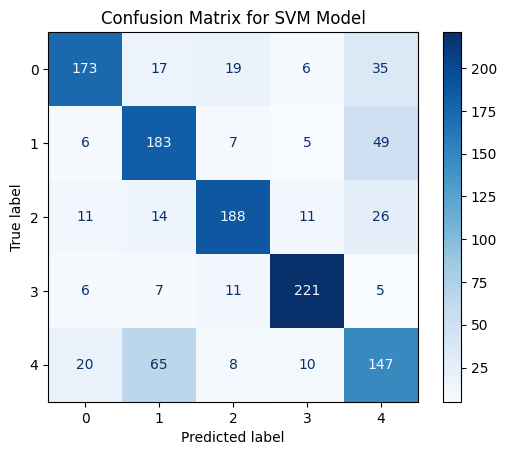

In [15]:
cm = confusion_matrix(validation_image_dataset.labels, val_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM Model")
plt.show()

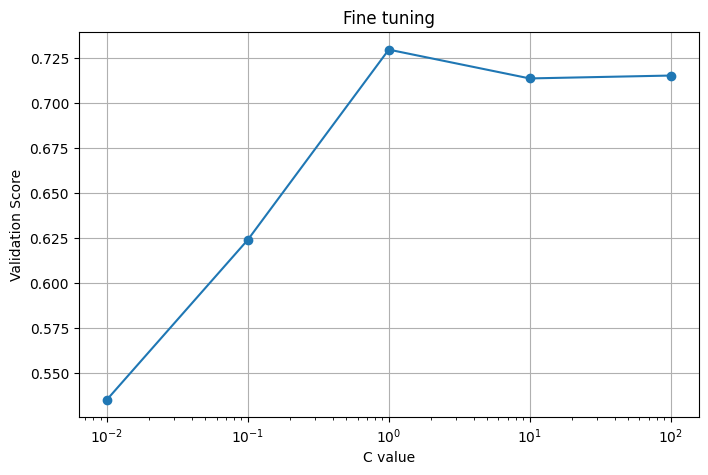

In [23]:
import matplotlib.pyplot as plt

C_values = [0.01, 0.1, 1, 10, 100]
validation_scores = [0.5352, 0.624, 0.7296, 0.7136, 0.7152]

plt.figure(figsize=(8, 5))
plt.plot(C_values, validation_scores, marker="o")
plt.xscale("log")
plt.xlabel("C value")
plt.ylabel("Validation Score")
plt.title("Fine tuning")
plt.grid(True)
plt.show()

In [11]:
import skops.io as sio

obj = sio.dump(model, "model_svm2.skops")

In [ ]:
import skops.io as sio

model = sio.load("model_svm2.skops")